In [70]:

library(tidyverse) # metapackage with lots of helpful functions

list.files(path = "../input")


[1] "santander-customer-transaction-prediction-dataset"

In [8]:
options(warn=-1)
library(tidyverse) 
library(ggplot2)
library(randomForest)
library(ROSE)
library(factoextra)
# library(ggsignif)
library(pROC)
# library(MLeval)
library(glmnet)
library(caret)
library(e1071)
library(DMwR)

In [9]:
df_santander<-read.csv('../input/santander-customer-transaction-prediction-dataset/train.csv')

In [10]:
set.seed(689)
train.index<-sample(1:nrow(df_santander),0.7*nrow(df_santander))

#train data
X<-df_santander[train.index,]

#validation data
y<-df_santander[-train.index,]
X<-X[,-c(1)]
y<-y[,-c(1)]

### Decision Tree

In [14]:
mod_fit <- train(target ~.,  data=X, method="rpart")

In [16]:
pred = predict(mod_fit, newdata=y,type="raw")
y_pred_num <- ifelse(pred > 0.5, 1, 0)

In [68]:
y_pred_num <- as.factor(y_pred_num)
confusionMatrix(data=y_pred_num, as.factor(y[,'target']))

Confusion Matrix and Statistics

          Reference
Prediction     0     1
         0 54038  5962
         1     0     0
                                         
               Accuracy : 0.9006         
                 95% CI : (0.8982, 0.903)
    No Information Rate : 0.9006         
    P-Value [Acc > NIR] : 0.5034         
                                         
                  Kappa : 0              
                                         
 Mcnemar's Test P-Value : <2e-16         
                                         
            Sensitivity : 1.0000         
            Specificity : 0.0000         
         Pos Pred Value : 0.9006         
         Neg Pred Value :    NaN         
             Prevalence : 0.9006         
         Detection Rate : 0.9006         
   Detection Prevalence : 1.0000         
      Balanced Accuracy : 0.5000         
                                         
       'Positive' Class : 0              
                                      

In [26]:
library(PRROC)


Attaching package: ‘PRROC’


The following object is masked from ‘package:ROSE’:

    roc.curve




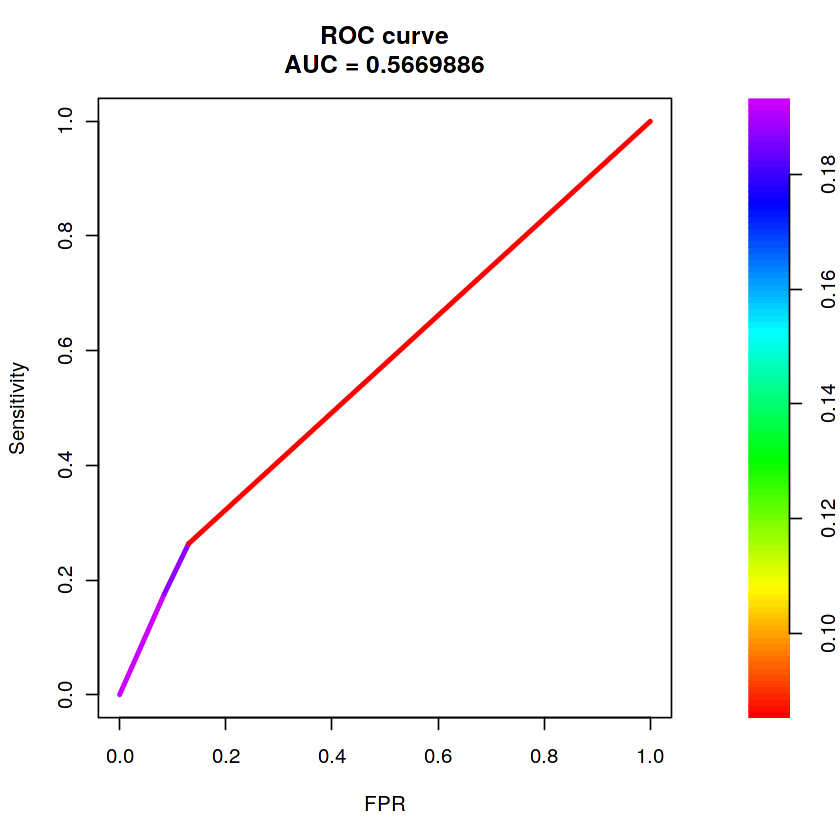

In [28]:
fg <- pred[y$target == 1]
bg <- pred[y$target == 0]

# ROC Curve    
roc <- roc.curve(scores.class0 = fg, scores.class1 = bg, curve = T)
plot(roc)

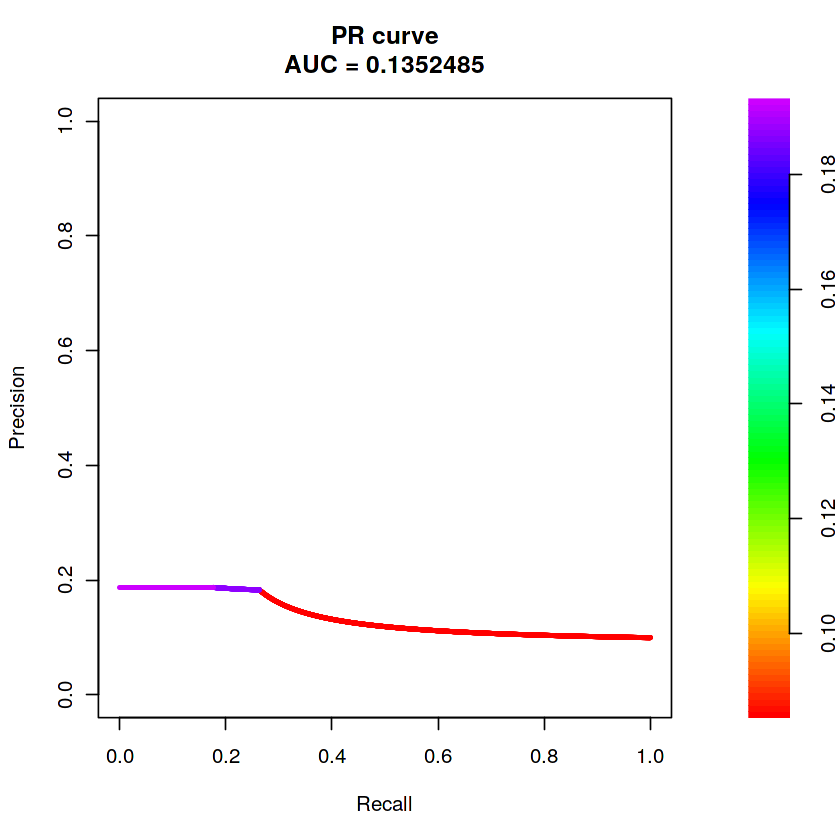

In [27]:
# PR Curve
pr <- pr.curve(scores.class0 = fg, scores.class1 = bg, curve = T)
plot(pr)

### Oversample the dataset

In [29]:
set.seed(699)
library('ROSE')

X_rose <- ROSE(target~., data =X[,],seed=32)$data
table(X_rose$target)

y_rose <- ROSE(target~., data =y[,],seed=42)$data

X_rose$target<-as.factor(X_rose$target)
y_rose$target <- as.factor(y_rose$target)


    0     1 
70036 69964 

In [30]:
rm("df_santander","X_train")
rm("y_train","X_test","y_test","X_train_rs","y_train_rs","X_test_rs","y_test_rs","x_pc","y_pc")
rm("train.index")
rm("X_index")

### DT ON ROSE DATASET

In [42]:
mod_fit_dt_rose <- train(target ~.,  data=X_rose, method="rpart")

In [43]:
pred_dt_rose = predict(mod_fit_dt_rose, newdata=y_rose,type='raw')
y_pred_num_dt_rose <- ifelse(pred_dt_rose > 0.5, 1, 0)

In [69]:
y_pred_num_dt_rose <- as.factor(y_pred_num_dt_rose)

In [56]:
confusionMatrix(data=pred_dt_rose, (y_rose[,'target']))

Confusion Matrix and Statistics

          Reference
Prediction     0     1
         0 22481 18865
         1  7442 11212
                                          
               Accuracy : 0.5616          
                 95% CI : (0.5576, 0.5655)
    No Information Rate : 0.5013          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.124           
                                          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.7513          
            Specificity : 0.3728          
         Pos Pred Value : 0.5437          
         Neg Pred Value : 0.6011          
             Prevalence : 0.4987          
         Detection Rate : 0.3747          
   Detection Prevalence : 0.6891          
      Balanced Accuracy : 0.5620          
                                          
       'Positive' Class : 0               
                  

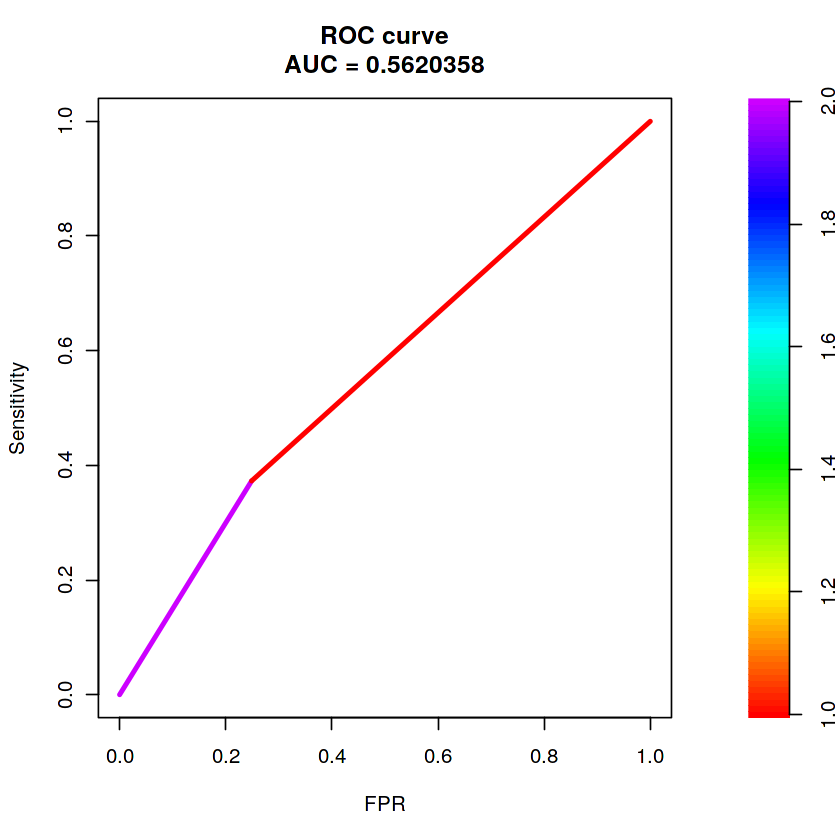

In [59]:
fg_rs <- pred_dt_rose[y_rose$target == 1]
bg_rs <- pred_dt_rose[y_rose$target == 0]

# ROC Curve    
roc_rs <- roc.curve(scores.class0 = fg_rs, scores.class1 = bg_rs, curve = T)
plot(roc_rs)

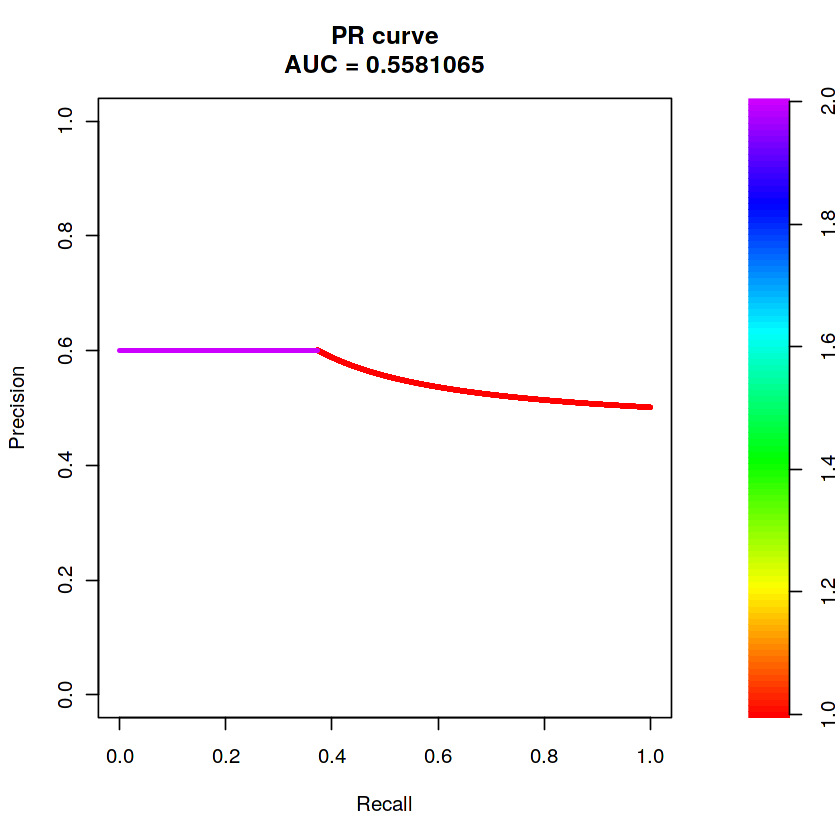

In [60]:
# PR Curve
pr_rs <- pr.curve(scores.class0 = fg_rs, scores.class1 = bg_rs, curve = T)
plot(pr_rs)